In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import sqlite3
import zipfile as zf
import os

In [3]:
df = pd.read_csv('./data/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.shape

(21597, 21)

In [7]:
df.mean()

id               4.580474e+09
price            5.402966e+05
bedrooms         3.373200e+00
bathrooms        2.115826e+00
sqft_living      2.080322e+03
sqft_lot         1.509941e+04
floors           1.494096e+00
sqft_above       1.788597e+03
yr_built         1.971000e+03
yr_renovated     8.363678e+01
zipcode          9.807795e+04
lat              4.756009e+01
long            -1.222140e+02
sqft_living15    1.986620e+03
sqft_lot15       1.275828e+04
dtype: float64

In [8]:
df.std()

id               2.876736e+09
price            3.673681e+05
bedrooms         9.262989e-01
bathrooms        7.689843e-01
sqft_living      9.181061e+02
sqft_lot         4.141264e+04
floors           5.396828e-01
sqft_above       8.277598e+02
yr_built         2.937523e+01
yr_renovated     3.999464e+02
zipcode          5.351307e+01
lat              1.385518e-01
long             1.407235e-01
sqft_living15    6.852305e+02
sqft_lot15       2.727444e+04
dtype: float64

In [19]:
df['grade'].value_counts()[1]

6065

ValueError: shape mismatch: objects cannot be broadcast to a single shape

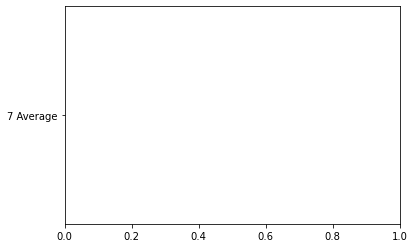

In [20]:
plt.barh(df['grade'], width=df['grade'].value_counts().values);

In [29]:
df['view'].value_counts(normalize=True)

NONE         0.901923
AVERAGE      0.044441
GOOD         0.023591
FAIR         0.015325
EXCELLENT    0.014721
Name: view, dtype: float64

In [22]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [26]:
df['waterfront'].isna()

0         True
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595     True
21596    False
Name: waterfront, Length: 21597, dtype: bool

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  